In [1]:
%cd ..

/scratch/gpfs/zzada/fconv


In [2]:
# import sys
# from importlib import reload
# reload(sys.modules['util.plot'])

import numpy as np
from util import plot
from scipy.cluster.hierarchy import cut_tree

In [4]:
modelname = 'model-gpt2-medium_layer-0.0'
Z = np.load(f'linkage_{modelname}.npy')
Z.shape

(81923, 4)

In [5]:
tree = cut_tree(Z, n_clusters=[7, 12, 14])
tree.shape

(81924, 3)

In [12]:
cut = 2

vals, counts = np.unique(tree[:, cut], return_counts=True)
bad_id = counts.argmax()
vals, counts, bad_id

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 3823,  1088, 20272,  3057,  5370,  4270,  6115,  4529,  5683,
         5041,  7185,  5884,  4145,  5462]),
 2)

In [13]:
values = tree[:, cut].copy()
bg_mask = values == bad_id
fg_mask = values == 0
values[bg_mask] = 0
values[fg_mask] = bad_id

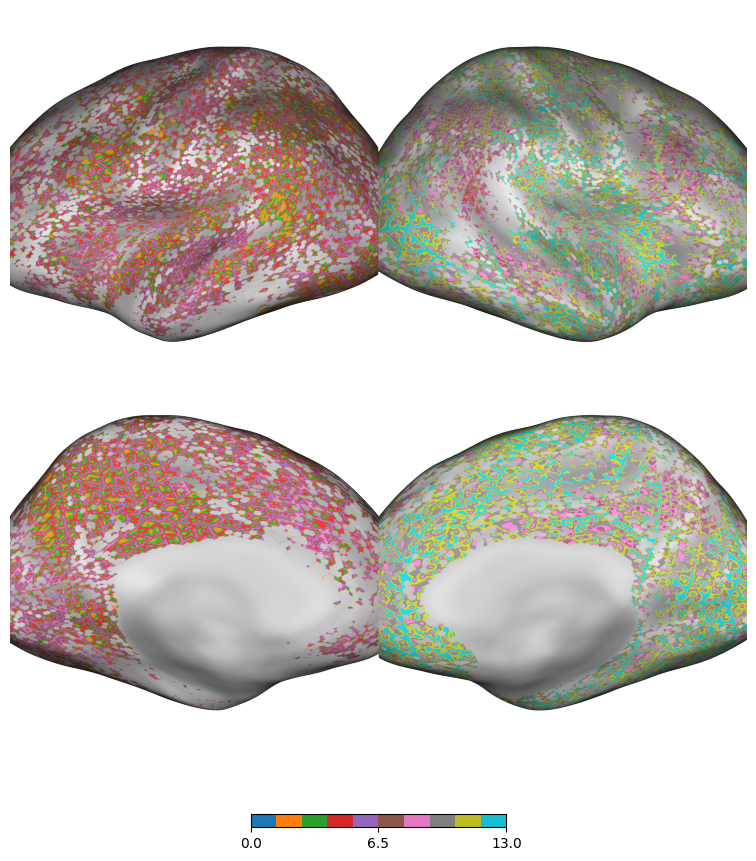

In [14]:
fig = plot.surface_plot(values, cmap='tab10', symmetric=False, vmin=0, size=(1000, 1000))

In [1]:
import os
import pickle
import torch
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import zscore, pearsonr
from util import subject
from util import plot
from collections import defaultdict
import seaborn as sns
from constants import *
from tqdm import tqdm
from util.path import Path
from himalaya.backend import set_backend

from himalaya.scoring import correlation_score
import sys
from importlib import reload

# resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1e9

# from util.atlas import get_glasser, parcellate_voxels
# pmask, plabels = get_glasser()

In [3]:
modelname = "model-gpt2-medium_layer-0.75"

In [4]:
for subA in tqdm(SUBS_STRANGERS):
    subB = subject.get_partner(subA)

    # load encoding model
    encpath = Path(root="encoding", sub=f"{subA:03d}", datatype=modelname, ext=".pkl")
    with open(encpath, "rb") as f:
        dsA = pickle.load(f)

    encpath = Path(root="encoding", sub=f"{subB:03d}", datatype=modelname, ext=".pkl")
    with open(encpath, "rb") as f:
        dsB = pickle.load(f)
    break

  0%|          | 0/58 [00:07<?, ?it/s]


In [5]:
wpA = np.stack(dsA['cv_weights_prod']).mean(0)
wcB = np.nanmean(np.nan_to_num(np.stack(dsB['cv_weights_comp'])), axis=0)
wpA.shape, wcB.shape

/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


((1024, 74947), (1024, 74947))

In [6]:
import torch

In [8]:
wpAd = torch.tensor(wpA, device='cuda')
wcBd = torch.tensor(wcB, device='cuda')

In [11]:
D = torch.cdist(wpAd.T[None], wcBd.T[None])

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.93 GiB (GPU 0; 15.89 GiB total capacity; 1.73 GiB already allocated; 13.80 GiB free; 1.74 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [10]:
D.shape

torch.Size([1, 1024, 1024])

In [39]:
from scipy.spatial.distance import cdist

In [ ]:
# https://stackoverflow.com/a/50865287
# https://stackoverflow.com/a/64477333
# pytorch cdist

In [41]:
D = cdist(wpA.T, wcB.T, metric='euclidean', )
D.shape